In [1]:
import logging, gensim, bz2
from gensim import corpora, models, similarities, matutils
from collections import defaultdict
import nltk
import pyLDAvis.gensim
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import os
import codecs
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag()

# Let's retrieve the documents. A document is a set of tweets of a user

In [2]:
setDocs1 = []
allDocuments = []
for file_name in os.listdir("/home/vagrant/shared/Test/1"):
    file = codecs.open("/home/vagrant/shared/Test/1/" + file_name, "r", "utf-8")
    aux = file.read()
    setDocs1.append(aux)
    allDocuments.append(aux)

In [3]:
setDocs2 = []
for file_name in os.listdir("/home/vagrant/shared/Test/2"):
    file = codecs.open("/home/vagrant/shared/Test/2/" + file_name, "r", "utf-8")
    aux = file.read()
    setDocs2.append(aux)
    allDocuments.append(aux)

# Preprocessing

In [4]:
texts = []
tokenizer = RegexpTokenizer(r'\w+')
stoplist_tw=['amp','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
            'pdt','pln','pst','wha','yep','yer','aest','didn','nzdt','via',
            'one','com','new','like','great','make','top','awesome','best',
            'good','wow','yes','say','yay','would','thanks','thank','going',
            'new','use','should','could','best','really','see','want','nice',
            'while','know']

unigrams = [ w for doc in allDocuments for w in doc if len(w)==1]
bigrams  = [ w for doc in allDocuments for w in doc if len(w)==2]

en_stop  = set(nltk.corpus.stopwords.words("english") + stoplist_tw
                + unigrams + bigrams)
p_stemmer = PorterStemmer()
# loop through document list
for i in allDocuments:
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

In [5]:
texts1 = []
tokenizer = RegexpTokenizer(r'\w+')
stoplist_tw=['amp','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
            'pdt','pln','pst','wha','yep','yer','aest','didn','nzdt','via',
            'one','com','new','like','great','make','top','awesome','best',
            'good','wow','yes','say','yay','would','thanks','thank','going',
            'new','use','should','could','best','really','see','want','nice',
            'while','know']

unigrams = [ w for doc in setDocs1 for w in doc if len(w)==1]
bigrams  = [ w for doc in setDocs1 for w in doc if len(w)==2]

en_stop  = set(nltk.corpus.stopwords.words("english") + stoplist_tw
                + unigrams + bigrams)
p_stemmer = PorterStemmer()
# loop through document list
for i in setDocs1:
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts1.append(stemmed_tokens)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts1]

In [6]:
#for i in xrange(len(corpus)):
#    for w in corpus[1]:
#        print dictionary[w[1]]

# LDA Model

In [38]:
lda_model_1 = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=10, alpha=0.001)

In [39]:
for i in xrange(3):
    print i
    for tup in lda_model_1.get_topic_terms(i):
        print dictionary[tup[0]] + ' ' + str(tup[1])

0
obama 0.0172668804158
act 0.00936785440312
american 0.00826319140254
state 0.00825751837109
presid 0.00824964538622
law 0.00712643591902
democrat 0.00600119731087
unit 0.0059994238444
born 0.00488230922691
control 0.00488149697112
1
alonso 0.0286420870525
prix 0.0112341111187
grand 0.0112318548875
start 0.0101493440495
ferrari 0.0101448053212
driver 0.00906135424617
season 0.00905535756672
finish 0.00798054644671
vettel 0.00688728615122
2010 0.00688669655002
2
gödel 0.01863449791
axiom 0.0186245147504
set 0.0140667803452
system 0.0106496532024
theori 0.00950957607564
theorem 0.00836808585436
logic 0.00836707825519
consist 0.0083646993969
number 0.00723600860229
natur 0.00722865982665


In [9]:
#data1 =  pyLDAvis.gensim.prepare(lda_model_1, corpus, dictionary)
#pyLDAvis.display(data1)

# Model 2

In [10]:
texts2 = []
tokenizer = RegexpTokenizer(r'\w+')
stoplist_tw=['amp','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
            'pdt','pln','pst','wha','yep','yer','aest','didn','nzdt','via',
            'one','com','new','like','great','make','top','awesome','best',
            'good','wow','yes','say','yay','would','thanks','thank','going',
            'new','use','should','could','best','really','see','want','nice',
            'while','know']

unigrams = [ w for doc in setDocs2 for w in doc if len(w)==1]
bigrams  = [ w for doc in setDocs2 for w in doc if len(w)==2]

en_stop  = set(nltk.corpus.stopwords.words("english") + stoplist_tw
                + unigrams + bigrams)
p_stemmer = PorterStemmer()
# loop through document list
for i in setDocs2:
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts2.append(stemmed_tokens)
    
# convert tokenized documents into a document-term matrix
corpus2 = [dictionary.doc2bow(text) for text in texts2]

In [42]:
lda_model_2 = gensim.models.ldamodel.LdaModel(corpus2, num_topics=3, id2word = dictionary, passes=10, alpha=0.001)

In [43]:
for i in xrange(3):
    print i
    for tup in lda_model_2.get_topic_terms(i):
        print dictionary[tup[0]] + ' ' + str(tup[1])

0
xiaomi 0.025422837595
smartphon 0.0160342951783
compani 0.0139329864803
first 0.00768624622668
2014 0.00766566901991
sell 0.00766386155801
store 0.00766244141595
phone 0.0066248307989
2013 0.00662395392302
announc 0.00662167093559
1
ture 0.028963799206
comput 0.0212580930421
machin 0.017959924513
univers 0.00696794848698
church 0.00586594687545
studi 0.00586460596688
war 0.0047765732381
first 0.00477434174571
work 0.00476581411254
mathemat 0.00476573009055
2
state 0.0246707833103
unit 0.018323806496
world 0.01411269878
war 0.00987080708436
american 0.0088109706725
countri 0.00880653450928
school 0.00669608091729
end 0.00564294586567
student 0.00564080228628
educ 0.00563839517142


In [13]:
#data2 =  pyLDAvis.gensim.prepare(lda_model_2, corpus2, dictionary)
#pyLDAvis.display(data2)

# Compare models


# Compare topics using cosine similarity


In [14]:
def bhattacharyya_distance(list_topic1, list_topic2):
    from collections import defaultdict
    from math import sqrt
    from math import log
    v_t0 = dict(list_topic1) #vector of the first topic
    v_t1 = dict(list_topic2) #vector of the second topic
    similarity = 0
    for key in v_t0:  #multiply components of both vectors
        if key in v_t1:
            #print dictionary[key] + ' ' + str(v_t0[key]) + ', ' + str(v_t1[key])
            similarity += sqrt(v_t0[key] * v_t1[key])
    #print -log(similarity)
    return -log(similarity)

In [15]:
def compute_similarity_two_topics(list_topic1, list_topic2):
    from collections import defaultdict
    from math import sqrt
    v_t0 = dict(list_topic1) #vector of the first topic
    dic = defaultdict(list)
    v_t1 = dict(list_topic2) #vector of the second topic
    norm_v_t0 = 0
    norm_v_t1 = 0
    for key in v_t0:  #multiply components of both vectors
        norm_v_t0 =  norm_v_t0 + (v_t0[key] *  v_t0[key]) #obtain the norm of the first vector
        if key in v_t1:
            dic[key] = v_t0[key] * v_t1[key]
    norm_v_t0 = sqrt(norm_v_t0) #last step to get the norm of the first vector

    for key in v_t1: #obtain the norm of the second vector
        norm_v_t1 =  norm_v_t1 + (v_t1[key] *  v_t1[key])
    norm_v_t1 = sqrt(norm_v_t1)

    similarity = 0
    for key in dic:
        similarity = similarity + dic[key]/(norm_v_t0 * norm_v_t1)
    return similarity

In [55]:
def compare_models_bhattacharyya(model1, model2, threshold):
    import sys
    for i in xrange(model1.num_topics):
        min_distance = sys.maxint
        equivalent_topic_in_model_b = 0
        for j in xrange(model2.num_topics):
            similarity = bhattacharyya_distance(model1.get_topic_terms(i, topn=len(dictionary)), model2.get_topic_terms(j, topn=len(dictionary)))
            if min_distance > similarity:
                min_distance = similarity
                equivalent_topic_in_model_b = j
        if min_distance <= threshold:
            print str(i) + ' ' + str(equivalent_topic_in_model_b) + ' ' + str(min_distance)
            print 'Model 1' 
            for tup in model1.get_topic_terms(i):
                print dictionary[tup[0]] + ' ' + str(tup[1])
            print 'Model 2' 
            for tup in model2.get_topic_terms(equivalent_topic_in_model_b):
                print dictionary[tup[0]] + ' ' + str(tup[1])

In [56]:
#Uses weighted arithmetic mean. Show a word clound with the similar topics found
#alpha: weight given to similarities between topics greater than threshold
#beta: weight given to similarities between topics lower than threshold
#It returns the distance between model1 and model2
def compare_models_and_viz(model1, model2, threshold, alpha, beta):
    import sys
    model1_topics = []
    for i in xrange(model1.num_topics):
        #print i
        words = []
        for tup in model1.get_topic_terms(i):
            t = ( dictionary[tup[0]],tup[1])
            words.append(t)
            #print dictionary[tup[0]] + ' ' + str(tup[1])
        model1_topics.append(words)
    
    model2_topics = []
    for i in xrange(model2.num_topics):
        #print i
        words = []
        for tup in model2.get_topic_terms(i):
            t = ( dictionary[tup[0]],tup[1])
            words.append(t)
            #print dictionary[tup[0]] + ' ' + str(tup[1])
        model2_topics.append(words)
    
    
    sim = []
    numerator = 0
    denominator = 0
    for i in xrange(model1.num_topics):
        min_distance = sys.maxint
        equivalent_topic_in_model_b = 0
        for j in xrange(model2.num_topics):
            similarity = bhattacharyya_distance(model1.get_topic_terms(i, topn=len(dictionary)), model2.get_topic_terms(j, topn=len(dictionary)))
            if min_distance > similarity:
                min_distance = similarity
                equivalent_topic_in_model_b = j
        #print min_distance
        if min_distance <= threshold:
            numerator = numerator + alpha * min_distance
            denominator = denominator + alpha
            sim.append(min_distance)
            print str(i) + ' ' + str(equivalent_topic_in_model_b) + ' ' + str(min_distance)
            wordcloud = WordCloud(width=800, height=600, relative_scaling=.8)\
                .generate_from_frequencies(model1_topics[i])
            plt.imshow(wordcloud)
            plt.axis("off")
            plt.show()
            wordcloud = WordCloud(width=800, height=600, relative_scaling=.8)\
                .generate_from_frequencies(model2_topics[equivalent_topic_in_model_b])
            plt.imshow(wordcloud)
            plt.axis("off")
            plt.show()
            #print 'Model 1' 
            #for tup in model1.get_topic_terms(i):
            #    print dictionary[tup[0]] + ' ' + str(tup[1])
            #print 'Model 2' 
            #for tup in model2.get_topic_terms(j):
            #    print dictionary[tup[0]] + ' ' + str(tup[1])
        else:
            numerator = numerator + beta * min_distance
            denominator = denominator + beta
    return numerator/denominator

0 2 0.189667189529


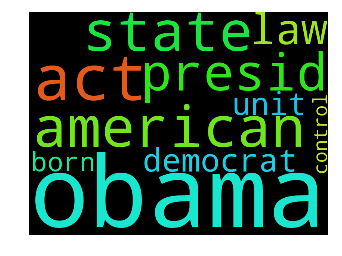

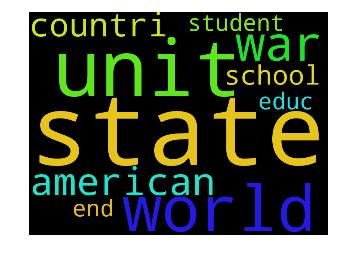

2 1 0.187439003613


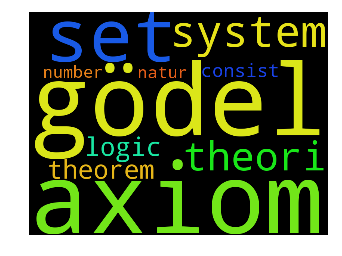

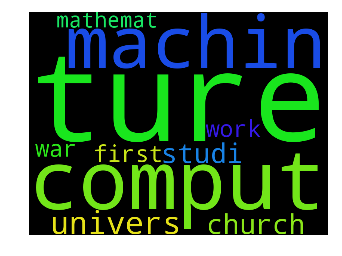

0.18855309657054503

In [57]:
compare_models_and_viz(lda_model_1, lda_model_2, 0.2, 1, 0)

In [58]:
compare_models_bhattacharyya(lda_model_1, lda_model_1, 1)

0 0 -1.97619698383e-14
Model 1
obama 0.0172668804158
act 0.00936785440312
american 0.00826319140254
state 0.00825751837109
presid 0.00824964538622
law 0.00712643591902
democrat 0.00600119731087
unit 0.0059994238444
born 0.00488230922691
control 0.00488149697112
Model 2
obama 0.0172668804158
act 0.00936785440312
american 0.00826319140254
state 0.00825751837109
presid 0.00824964538622
law 0.00712643591902
democrat 0.00600119731087
unit 0.0059994238444
born 0.00488230922691
control 0.00488149697112
1 1 4.32986979604e-15
Model 1
alonso 0.0286420870525
prix 0.0112341111187
grand 0.0112318548875
start 0.0101493440495
ferrari 0.0101448053212
driver 0.00906135424617
season 0.00905535756672
finish 0.00798054644671
vettel 0.00688728615122
2010 0.00688669655002
Model 2
alonso 0.0286420870525
prix 0.0112341111187
grand 0.0112318548875
start 0.0101493440495
ferrari 0.0101448053212
driver 0.00906135424617
season 0.00905535756672
finish 0.00798054644671
vettel 0.00688728615122
2010 0.00688669655002
2

In [20]:
bhattacharyya_distance(lda_model_1.get_topic_terms(0, topn=len(dictionary)), lda_model_1.get_topic_terms(0, topn=len(dictionary)))

-3.0198066269803804e-14

In [21]:
def k_l_divergence(list_topic1, list_topic2):
    from collections import defaultdict
    from math import sqrt
    from math import log
    v_t0 = dict(list_topic1) #vector of the first topic
    v_t1 = dict(list_topic2) #vector of the second topic
    similarity = 0
    for key in v_t0:  #multiply components of both vectors
        if key in v_t1:
            #print dictionary[key] + ' ' + str(v_t0[key]) + ', ' + str(v_t1[key])
            similarity += v_t0[key] * log(v_t0[key] / v_t1[key])
    return similarity

In [22]:
def k_l_similarity(list_topic1, list_topic2):
    return (0.5 * 
            (k_l_divergence(list_topic1, list_topic2) + 
            k_l_divergence(list_topic2, list_topic1)
            ))

In [23]:
from ford_fulkerson import *

In [24]:
g = FlowNetwork()
map(g.AddVertex, ['s', 'm1_1', 'm1_2', 'm2_1', 'm2_2', 't'])
g.AddEdge('s', 'm1_1', 1)
g.AddEdge('s', 'm1_2', 1)
g.AddEdge('m1_1', 'm2_1', 1/k_l_divergence(lda_model_1.get_topic_terms(0, topn=len(dictionary)), lda_model_2.get_topic_terms(0, topn=len(dictionary))))
g.AddEdge('m1_1', 'm2_2', 1/k_l_divergence(lda_model_1.get_topic_terms(0, topn=len(dictionary)), lda_model_2.get_topic_terms(1, topn=len(dictionary))))
g.AddEdge('m1_2', 'm2_1', 1/k_l_divergence(lda_model_1.get_topic_terms(1, topn=len(dictionary)), lda_model_2.get_topic_terms(0, topn=len(dictionary))))
g.AddEdge('m1_2', 'm2_2', 1/k_l_divergence(lda_model_1.get_topic_terms(1, topn=len(dictionary)), lda_model_2.get_topic_terms(1,topn=len(dictionary))))
g.AddEdge('m2_1', 't', 1)
g.AddEdge('m2_2', 't', 1)
print g.MaxFlow('s', 't')

2.0


In [25]:
print k_l_similarity(lda_model_1.get_topic_terms(0, topn=len(dictionary)), lda_model_1.get_topic_terms(0, topn=len(dictionary)))
print k_l_similarity(lda_model_1.get_topic_terms(0, topn=len(dictionary)), lda_model_2.get_topic_terms(1, topn=len(dictionary)))
print k_l_similarity(lda_model_1.get_topic_terms(1, topn=len(dictionary)), lda_model_2.get_topic_terms(0, topn=len(dictionary)))
print k_l_similarity(lda_model_1.get_topic_terms(1, topn=len(dictionary)), lda_model_2.get_topic_terms(1, topn=len(dictionary)))

0.0
1.07746862199
1.14511358399
0.757640958527


In [52]:
print k_l_divergence(lda_model_1.get_topic_terms(0, topn=len(dictionary)), lda_model_1.get_topic_terms(0, topn=len(dictionary))) #LA DIVERGENCIA ES 0

0.0


In [28]:
from math import sqrt
aux = 0
aux2 = 0
for tup in lda_model_1.get_topic_terms(1):
    aux += tup[1]
    aux2 += sqrt(tup[1]*tup[1])
print aux
print aux2

0.111242304012
0.111242304012


In [29]:
print len(lda_model_1.get_topic_terms(1, topn=len(dictionary)))
print len(lda_model_1.show_topic(1, topn=len(dictionary)))

1318
1318


In [53]:
g = FlowNetwork()
map(g.AddVertex, ['s', 'm1_1', 'm1_2', 'm2_1', 'm2_2', 't'])
g.AddEdge('s', 'm1_1', 1)
g.AddEdge('s', 'm1_2', 1)
g.AddEdge('m1_1', 'm2_1', 1/bhattacharyya_distance(lda_model_1.get_topic_terms(0, topn=len(dictionary)), lda_model_1.get_topic_terms(0, topn=len(dictionary))))
g.AddEdge('m1_1', 'm2_2', 1/bhattacharyya_distance(lda_model_1.get_topic_terms(0, topn=len(dictionary)), lda_model_1.get_topic_terms(1, topn=len(dictionary))))
g.AddEdge('m1_2', 'm2_1', 1/bhattacharyya_distance(lda_model_1.get_topic_terms(1, topn=len(dictionary)), lda_model_1.get_topic_terms(0, topn=len(dictionary))))
g.AddEdge('m1_2', 'm2_2', 1/bhattacharyya_distance(lda_model_1.get_topic_terms(1, topn=len(dictionary)), lda_model_1.get_topic_terms(1, topn=len(dictionary))))
g.AddEdge('m2_1', 't', 1)
g.AddEdge('m2_2', 't', 1)
print g.MaxFlow('s', 't')

2


In [54]:
bhattacharyya_distance(lda_model_1.get_topic_terms(0, topn=len(dictionary)), lda_model_1.get_topic_terms(0, topn=len(dictionary)))

-1.976196983832759e-14

In [32]:
print 1/bhattacharyya_distance(lda_model_1.get_topic_terms(0, topn=len(dictionary)), lda_model_1.get_topic_terms(0, topn=len(dictionary)))
print 1/bhattacharyya_distance(lda_model_1.get_topic_terms(0, topn=len(dictionary)), lda_model_1.get_topic_terms(1, topn=len(dictionary)))
print 1/bhattacharyya_distance(lda_model_1.get_topic_terms(1, topn=len(dictionary)), lda_model_1.get_topic_terms(0, topn=len(dictionary)))
print 1/bhattacharyya_distance(lda_model_1.get_topic_terms(1, topn=len(dictionary)), lda_model_1.get_topic_terms(1, topn=len(dictionary)))

-3.31147031424e+13
3.52627628741
3.52627628741
1.50119987579e+14


2
